In [1]:
import scipy
import numpy as np
import pandas as pd

import statsmodels.api as sm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

#### Задание:
Проанализировать результаты эксперимента и написать рекомендации менеджеру.

##### Условие задачи:

* Продукт: игра для смартфона
* Текущая (контрольная) версия: в игре задан чек-пойн на 30 уровне.
* Тестовая версия: чек-пойнт перемещён на 40 уровень (игра усложняется)
* Метрики для анализа: ретеншн на след. день и через 7 дней после установки приложения.

In [2]:
df = pd.read_csv('HW9_Task.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


##### Датасет:

* userid - уникальный номер игрока
* version - тестовая (gate_40) или контрольная (gate_30) версия
* sum_gamerounds - количество сыгранных игроком раундов в первые 14 дней после установки игры
* retention_1 - возвращение к игре на след. день после установки
* retention_7 - возвращение к игре через 7 дней после установки

In [3]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


Есть данные по 90189 игрокам.
В среднем за две недели каждый игрок сыграл около 52х раундов игры.

Также в среднем 44.5% игроков продолжили играть на следующий день после установки приложения (retention_1), а 18.6% играли как минимум в течение 7 дней после установки (retention_7).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


Пропусков в данных нет, типы данных корректные.

In [5]:
df.userid.value_counts().sort_values()

116        1
488        1
540        1
1066       1
1444       1
          ..
9994217    1
9997049    1
9996999    1
9974108    1
9999861    1
Name: userid, Length: 90189, dtype: int64

Дубли по уникальному ID игрока отсутствуют.

In [6]:
df.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

Распределение по количеству наблюдений между тестовой и контрольной группой примерно одинаковое.

Далее для анализа будем использовать z-критерий долей, так как наша задача - это посмотреть на долю игроков, которые продолжают играть в течение определённого промежутка времени.

За нулевую гипотезу каждый раз принимаем отсутствие различий между тестовой и контрольной группой по проверяемой метрике.

#### Retention 1 дня

In [7]:
n1, n2 = df.version.value_counts()
print(f'Число наблюдений в двух выборках: {n1}, {n2}.')

ret1_1, ret1_2 = df.query('retention_1 == 1').version.value_counts()
print(f'Число возвратов к игре в двух выборках: {ret1_1}, {ret1_2}.')

Число наблюдений в двух выборках: 45489, 44700.
Число возвратов к игре в двух выборках: 20119, 20034.


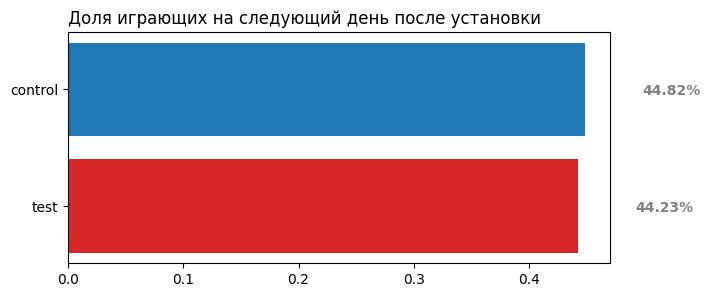

In [8]:
retention1_table = pd.Series([ret1_1 / n1, ret1_2 / n2], index = ['test', 'control'])

fig, ax = plt.subplots(figsize = (7, 3))

ax.barh(retention1_table.index, retention1_table, color = ['tab:red', 'tab:blue'])

for i in ax.patches:
    plt.text(i.get_width() + 0.05, i.get_y() + 0.35,
             f'{round(round((i.get_width()), 4) * 100, 2)}%',
             fontsize = 10, fontweight = 'bold',
             color ='grey')

ax.set_title('Доля играющих на следующий день после установки', loc ='left')

plt.show()

In [9]:
from statsmodels.stats import proportion
proportion.proportions_ztest(np.array([ret1_1, ret1_2]), np.array([n1, n2]))

(-1.7840862247974725, 0.07440965529691913)

p-value = 7.4%, что больше alpha (5%), а значит, не отвергаем нулевую гипотезу: стат. значимых различий нет.

#### Retention 7 дня

In [10]:
n1, n2 = df.version.value_counts()
print(f'Число наблюдений в двух выборках: {n1}, {n2}.')

ret7_1, ret7_2 = df.query('retention_7 == 1').version.value_counts()
print(f'Число возвратов к игре в двух выборках: {ret7_1}, {ret7_2}.')

Число наблюдений в двух выборках: 45489, 44700.
Число возвратов к игре в двух выборках: 8502, 8279.


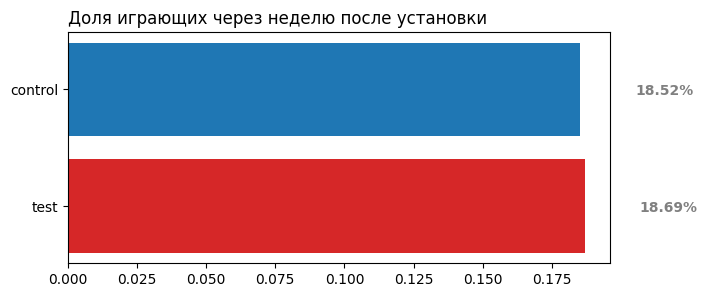

In [11]:
retention7_table = pd.Series([ret7_1 / n1, ret7_2 / n2], index = ['test', 'control'])

fig, ax = plt.subplots(figsize = (7, 3))

ax.barh(retention7_table.index, retention7_table, color = ['tab:red', 'tab:blue'])

for i in ax.patches:
    plt.text(i.get_width() + 0.02, i.get_y() + 0.35,
             f'{round(round((i.get_width()), 4) * 100, 2)}%',
             fontsize = 10, fontweight = 'bold',
             color ='grey')

ax.set_title('Доля играющих через неделю после установки', loc ='left')

plt.show()

In [12]:
proportion.proportions_ztest(np.array([ret7_1, ret7_2]), np.array([n1, n2]))

(0.6519862722187609, 0.5144100282874542)

p-value = 51.4%, что больше alpha (5%), а значит, не отвергаем нулевую гипотезу: стат. значимых различий нет.

Прежде чем сделать окончательный вывод о том, что статистически значимых различий не найдено, проверим мощность теста.

##### Retention 1

In [13]:
import math

p_1 = ret1_1 / n1
p_2 = ret1_2 / n2

h = 2 * math.asin(np.sqrt(p_1)) - 2 * math.asin(np.sqrt(p_2))
print(f'retention_1: {round(p_1 * 100, 2)}%, {round(p_2 * 100, 2)}%; effect_size = {h}')

retention_1: 44.23%, 44.82%; effect_size = -0.011881898259223478


In [14]:
import statsmodels.stats.power as smp

alpha = 0.05

power1 = smp.zt_ind_solve_power(effect_size = h, nobs1 = n1, alpha = alpha, alternative = 'two-sided')
print(f'мощность критерия = {round(power1 * 100, 2)}%')

мощность критерия = 43.34%


Видим, что мощность критерия слишком низкая, чтобы быть на 100% уверенным в результатах теста относительно метрики retention_1.

##### Retention 7

In [15]:
p_1 = ret7_1 / n1
p_2 = ret7_2 / n2

h = 2 * math.asin(np.sqrt(p_1)) - 2 * math.asin(np.sqrt(p_2))
print(f'retention_1: {round(p_1 * 100, 2)}%, {round(p_2 * 100, 2)}%; effect_size = {h}')

retention_1: 18.69%, 18.52%; effect_size = 0.004342261187737395


Чем меньше effect_size, тем больше должна быть выборка. То есть здесь опять мощность теста будет недостаточной.

In [16]:
alpha = 0.05

power7 = smp.zt_ind_solve_power(effect_size = h, nobs1 = n1, alpha = alpha, alternative = 'two-sided')
print(f'мощность критерия = {round(power7 * 100, 2)}%')

мощность критерия = 10.04%


Действительно, мощность упала ещё ниже.

Получается, что для обеих метрик имеем недостаточно данных, крайне вероятна ошибка false negative.

##### Расчёт необходимого количества наблюдений

In [17]:
power = 0.8

# посчитаем только для меньшего effect_size, тк для него нужна большая длительность теста
num7 = smp.zt_ind_solve_power(effect_size = h, alpha = alpha, power = power, alternative = 'two-sided')

print(f'Необходимое количество наблюдений для двух метрик: {round(num7, 0)}.')

Необходимое количество наблюдений для двух метрик: 832539.0.


#### **Вывод и рекомендации для менеджера:**

По результатам проверки итогов эксперимента статистически значимых различий не выявлено.
Однако проверка мощности теста показала высокую вероятность ошибки false negative,
поэтому рекомендация - не вносить изменения в приложение, а перезапустить тест и набрать необходимый объём выборки (около 833 тыс. наблюдений).